#**Linear Regression Project**
 
***Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.***

***The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!***

***Just follow the steps below to analyze the customer data (it's has some bogus data, don't worry I didn't give you real credit card numbers or emails).***

##**Required libraries**
**Numpy**
   
   **Pandas**

**Matplotlib**

**Seaborn**

**Sklearn**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

##Loding dataset

In [5]:
data = pd.read_csv('/Ecommerce Customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


##Working with the data
Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

In [4]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

##Exploratory Data Analysis
Let's explore the data!

Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

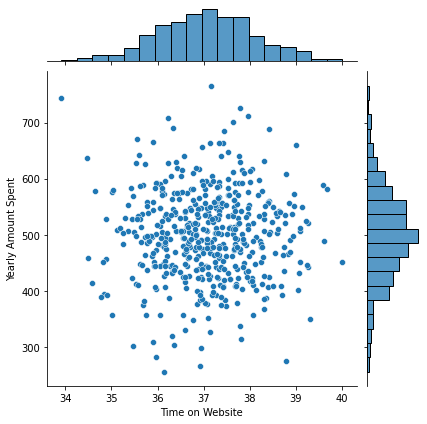

In [8]:
sb.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

Time on App and Yearly Amount Spend Analysis

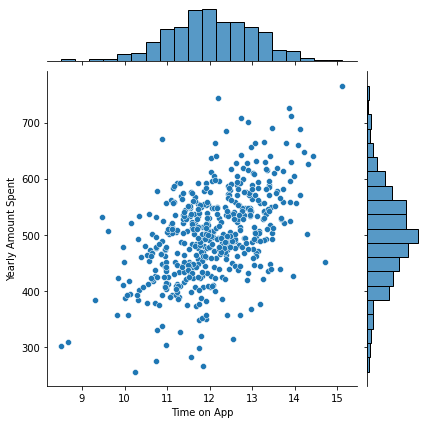

In [10]:
sb.jointplot(x='Time on App',y='Yearly Amount Spent', data = data)

Time on App and Length of Membership analysis

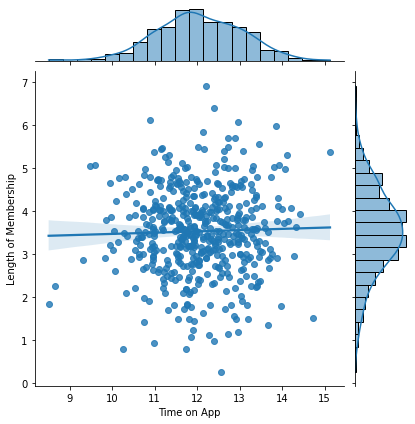

In [22]:
sb.jointplot(x='Time on App',y='Length of Membership',data=data, kind = 'reg')

Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.

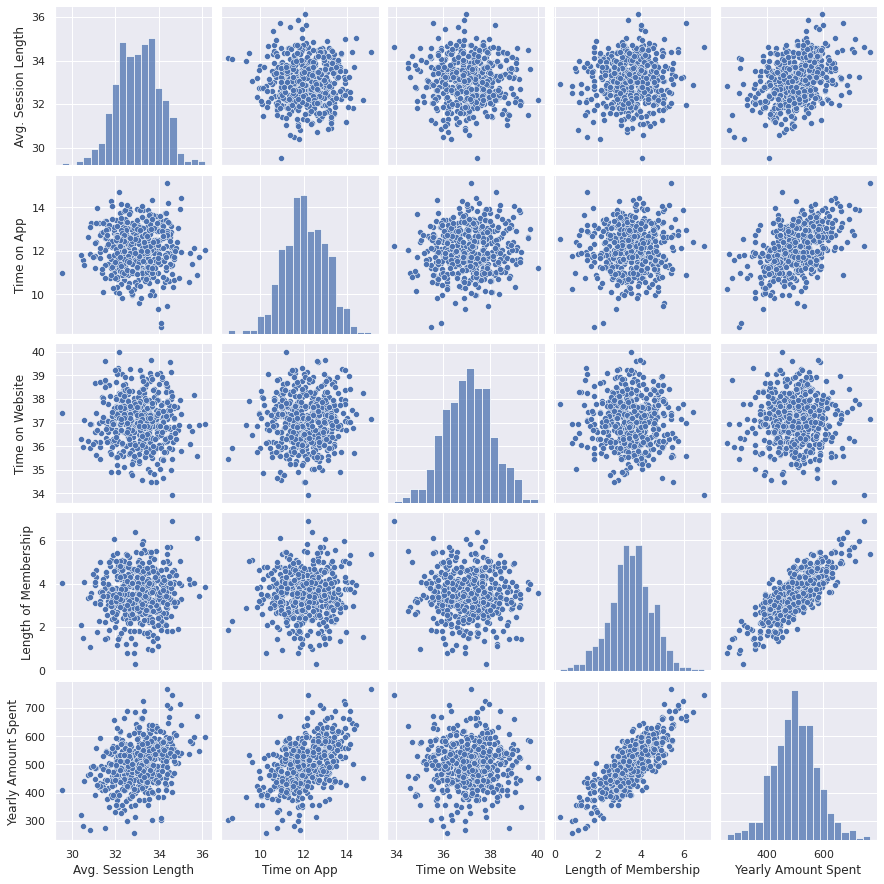

In [30]:
sb.pairplot(data)

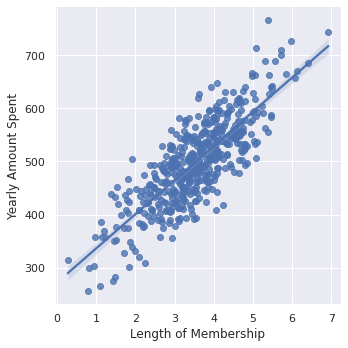

In [32]:
sb.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = data)

##Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [41]:
x = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [42]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size = 0.3, random_state=101)

###Training the Model
Now its time to train our model on our training data!

Create an instance of a LinearRegression() model named ml.

Train/fit lm on the training data.

Print out the coefficients of the model

In [43]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(train_x,train_y)
print(ml.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predictions ')

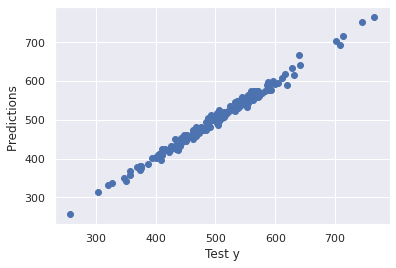

In [50]:
prdins = ml.predict(test_x)
plt.scatter(test_y,prdins)
plt.xlabel("Test y")
plt.ylabel("Predictions ")

###Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [52]:
import sklearn.metrics as skm
a=skm.mean_absolute_error(test_y,prdins)
b=skm.mean_squared_error(test_y,prdins)
c=np.sqrt(b)
print("MAE: ",a,"\nMSE: ",b,"\nRMSE: ",c)

MAE:  7.228148653430845 
MSE:  79.81305165097463 
RMSE:  8.933815066978644


###Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


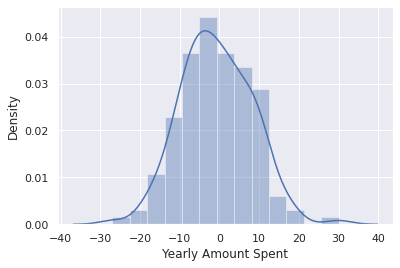

In [53]:
sb.distplot(test_y-prdins)

##Conclusion
**We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.**

Recreate the dataframe below.

In [56]:
df=pd.DataFrame(ml.coef_,x.columns,columns=['cofficients'])
df

,cofficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Given that the coefficients are all positive, for every unit change in the features, the average yearly spend increases by the coefficient holding all other features fixed. In this case, the most important factor seems to be the length of membership of a customer.**

**Should the company focus more on their mobile app or on their website?**

**If the company really needs to choose now between the two, they should focus more on their mobile app as it has a bigger influence on yearly spend based on the length of time the customers spend on it. It would be also good to explore the relationship between how long a customer has been a member (length of membership) and the time they spend on the app and website. That might yield some better conclusions and action plans for the company.**

How can you interpret these coefficients?

The greater the value the more related it is to the target, in this case yearly amount spent

Do you think the company should focus more on their mobile app or on their website?

The company should focus on the mobile app